In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# pd.read_csv('../', sep = ',')

In [86]:
with open("output/all_transf_loss_valid_all_value_label1_day30/rolling2007-01-01/pred.pkl.test0", 'rb') as f:
    best_model_preds1 = pickle.load(f)

In [87]:
best_model_preds1r = best_model_preds1.reset_index()
label1_df1 = best_model_preds1r[best_model_preds1r['instrument']==1]
label1 = label1_df1['label'].reset_index(drop=True)

In [88]:
with open("output/all_transf_loss_valid_all_value_label5_day30/rolling2007-01-01/pred.pkl.test0", 'rb') as f:
    best_model_preds = pickle.load(f)

In [89]:
best_model_predsr = best_model_preds.reset_index()

In [90]:
best_model_predsr1 = best_model_predsr[best_model_predsr['instrument']==1]

In [91]:
a = label1.copy()
b = best_model_predsr1['score'].reset_index(drop=True)

In [92]:
# a = label1.copy() #best_model_predsr1['label'].reset_index(drop=True)
N = 1
TIR = 0
huanshou = 0
TIR_list = []
for t in range(b.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

7.4838898832933864

In [93]:
# a = label1.copy() #best_model_predsr1['label'].reset_index(drop=True)
N = 1
TIR_hold = 0
TIR_hold_list = []
for t in range(b.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

0.16456409486977464

In [94]:
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(b.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = b[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.2279395489642866

In [101]:
TIR_p_list

[0.01786402054131031,
 0.017236513027455658,
 0.025831052975263447,
 0.042114362062420696,
 0.05654386797687039,
 0.05585051380330697,
 0.06676176894688979,
 0.06681678604218177,
 0.06644419170334004,
 0.07140259267180227,
 0.10973774091689847,
 0.13854789370088838,
 0.18378352010040544,
 0.22952520856051706,
 0.2563473657646682,
 0.2506476129346993,
 0.2436220823728945,
 0.2166176578903105,
 0.18641982329427265,
 0.18662357996799983,
 0.1885178756492678,
 0.19257405973621644,
 0.19770090296515264,
 0.1896703458914999,
 0.17166733476915397,
 0.16845862442278303,
 0.16173123256885447,
 0.17271122397505678,
 0.18398419363074936,
 0.19209334408515133,
 0.18292719931923784,
 0.18434728871216066,
 0.19926179296453483,
 0.2003503637679387,
 0.22618609017808922,
 0.2821659865148831,
 0.34754792324383743,
 0.4006976867385674,
 0.4406966241367627,
 0.4849684322543908,
 0.554670208162861,
 0.5809809817292262,
 0.6055700080760289,
 0.62329773887177,
 0.6139437472738791,
 0.5500080650963355,
 0.51

<Axes: >

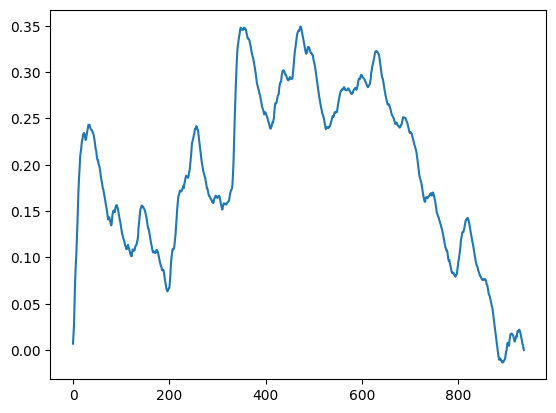

In [105]:
bm.cumsum().plot()

In [106]:
for y in [2019,2020,2021,2022]:
    c = best_model_predsr1[best_model_predsr1['year']==str(y)]
    a = c['label'].reset_index(drop=True)
    # b = c['score'].reset_index(drop=True)
    TIR_p = 0
    TIR_p_list = []
    TIR_hold = 0
    TIR_hold_list = []
    for t in range(a.shape[0]):
        true_Rj = a[t] # a[t+N] / a[t] -1
        TIR_hold +=  true_Rj
        TIR_hold_list.append(TIR_hold)
        pre_Rj = bm[t] # b[t+N] / b[t] -1
        TIR_p += np.sign(pre_Rj)* true_Rj
        TIR_p_list.append(TIR_p)
    print(y,TIR_hold,TIR_p)
    

2019 0.48326557129985304 0.8691922165926371
2020 0.8143778657540679 -0.6287723827408627
2021 0.11476180775935063 0.05193383561709197
2022 -0.7017247773183044 0.5798839978233445


Text(0.5, 1.0, '000001, label5, day30')

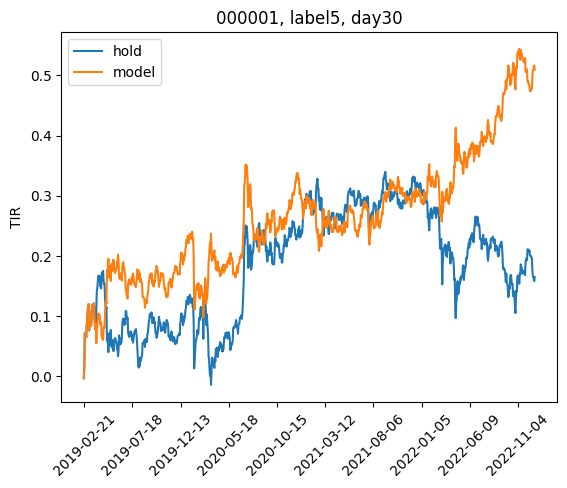

In [57]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),100),rotation=45)
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001, label5, day30')

Text(0.5, 1.0, '000001, label5, -mean, time2')

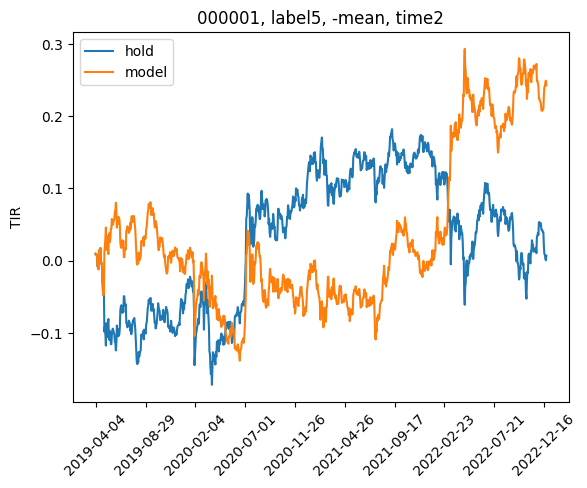

In [27]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),100),rotation=45)
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001, label5, -mean, time2')

Text(0.5, 1.0, '000001, label20')

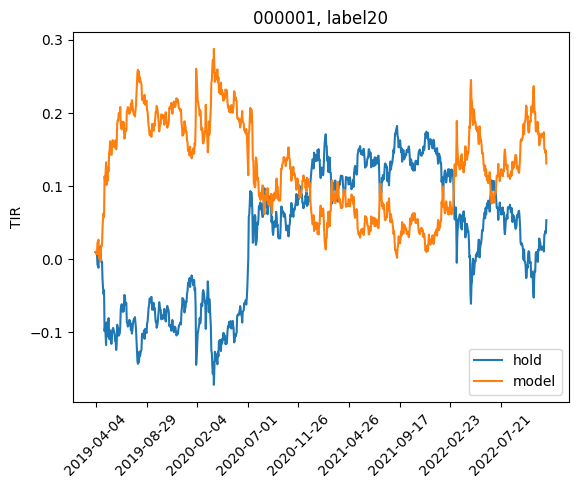

In [87]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),100),rotation=45)
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001, label20')

Text(0.5, 1.0, '000001, label10,-mean')

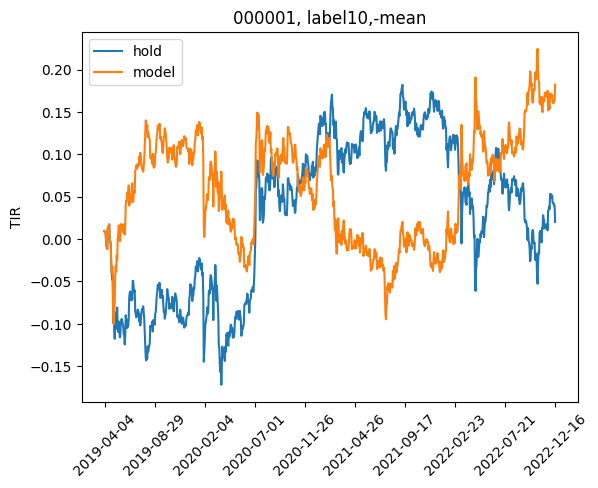

In [67]:
# plt.plot(TIR_list)
plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),100),rotation=45)
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001, label10,-mean')

Text(0.5, 1.0, '000001, label5, -mean')

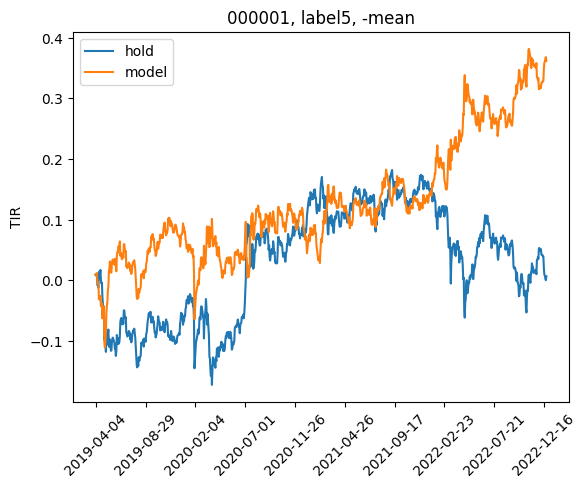

In [52]:
# plt.plot(TIR_list)
plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),100),rotation=45)
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001, label5, -mean')

Text(0.5, 1.0, '000001')

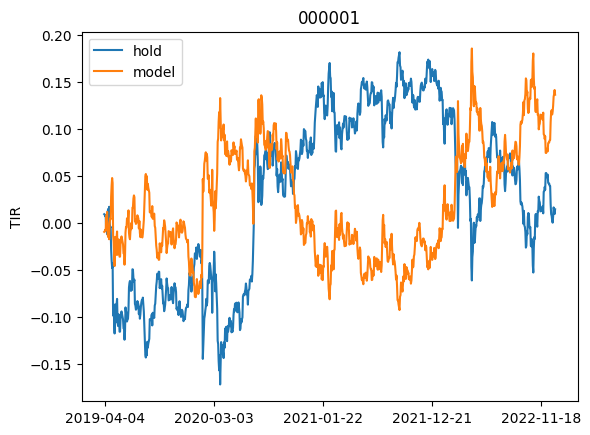

In [13]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001')

In [95]:
bm = b-b.mean()
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(b.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = bm[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.509808682974608

<Axes: >

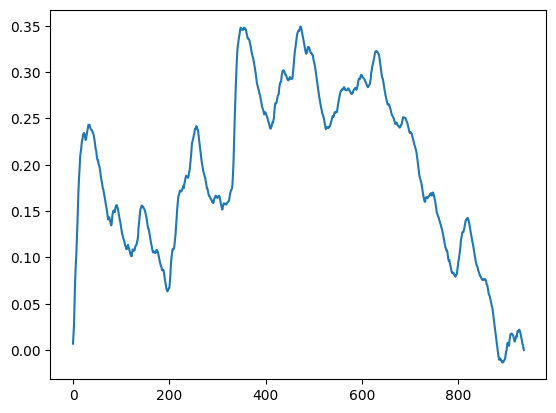

In [102]:
bm.cumsum().plot()

ValueError: x and y must have same first dimension, but have shapes (937,) and (237,)

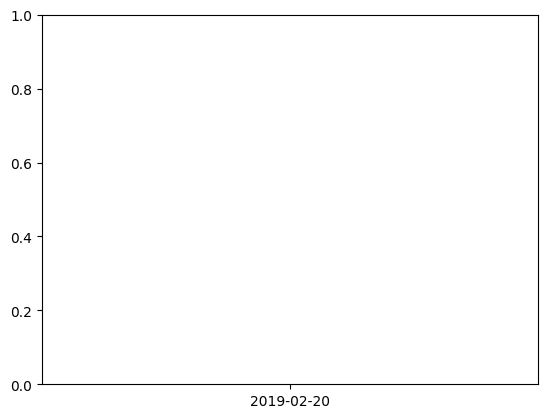

In [104]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),100),rotation=45)
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001, label5, day30')

In [97]:
sum((b * b.shift(1)) < 0), sum((bm * bm.shift(1)) < 0)

(63, 153)

In [99]:
best_model_predsr1['year'] = [i[:4] for i in best_model_predsr1['datetime']]

/home/xiaoguang/xinyi/fullgoal/time-selection/code/ipykernel_72122/738594949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_model_predsr1['year'] = [i[:4] for i in best_model_predsr1['datetime']]


In [100]:
for y in [2019,2020,2021,2022]:
    c = best_model_predsr1[best_model_predsr1['year']==str(y)]
    a = c['label'].reset_index(drop=True)
    b = c['score'].reset_index(drop=True)
    
    TIR_p = 0
    TIR_p_list = []
    TIR_hold = 0
    TIR_hold_list = []
    for t in range(a.shape[0]):
        true_Rj = a[t] # a[t+N] / a[t] -1
        TIR_hold +=  true_Rj
        TIR_hold_list.append(TIR_hold)
        pre_Rj = b[t] # b[t+N] / b[t] -1
        TIR_p += np.sign(pre_Rj)* true_Rj
        TIR_p_list.append(TIR_p)
    print(y,TIR_hold,TIR_p)
    

2019 0.48326557129985304 0.2305000497981382
2020 0.8143778657540679 -0.6396283118519932
2021 0.11476180775935063 -0.0059836863438249566
2022 -0.7017247773183044 0.8026889910397585


In [59]:
best_model_predsr300 = best_model_predsr[best_model_predsr['instrument']==300]

In [61]:
a = best_model_predsr300['label'].reset_index(drop=True)
N = 1
TIR = 0
huanshou = 0
TIR_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

20.441676176121405

In [62]:
a = best_model_predsr300['label'].reset_index(drop=True)
N = 1
TIR_hold = 0
TIR_hold_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

0.7957067276266798

In [63]:
b = best_model_predsr300['score'].reset_index(drop=True)
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = b[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.7371997348990362

Text(0.5, 1.0, '000300,-mean,label5,day30')

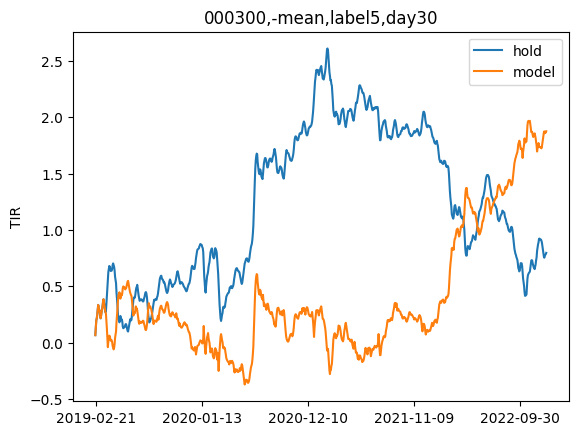

In [66]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000300,-mean,label5,day30')

In [65]:
bm = b-b.mean()
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = bm[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

1.8750983846283589

In [67]:
best_model_predsr905 = best_model_predsr[best_model_predsr['instrument']==905]

In [68]:
a = best_model_predsr905['label'].reset_index(drop=True)
N = 1
TIR = 0
huanshou = 0
TIR_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

21.639017178706126

In [69]:
a = best_model_predsr905['label'].reset_index(drop=True)
N = 1
TIR_hold = 0
TIR_hold_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

1.4115226389985764

In [70]:
b = best_model_predsr905['score'].reset_index(drop=True)
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = b[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

1.302429470801144

Text(0.5, 1.0, '000905,-mean,label5,day30')

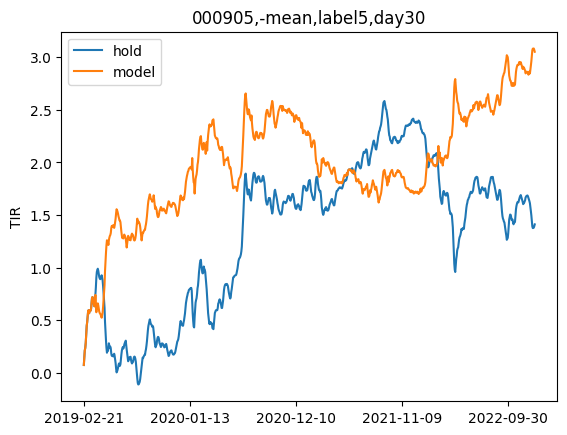

In [73]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000905,-mean,label5,day30')

In [72]:
bm = b-b.mean()
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = bm[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

3.052489509311272

In [74]:
best_model_predsr852 = best_model_predsr[best_model_predsr['instrument']==852]

In [75]:
a = best_model_predsr852['label'].reset_index(drop=True)
N = 1
TIR = 0
huanshou = 0
TIR_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

25.1409512380651

In [76]:
N = 1
TIR_hold = 0
TIR_hold_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

1.6048565555956884

In [77]:
b = best_model_predsr852['score'].reset_index(drop=True)
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = b[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

1.3662938081415632

In [79]:
bm = b-b.mean()
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = bm[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

3.935332786570143

Text(0.5, 1.0, '000852,-mean,label5,day30')

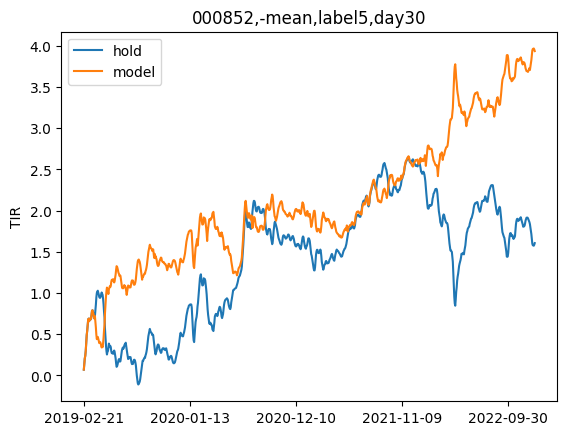

In [82]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000852,-mean,label5,day30')

<Axes: >

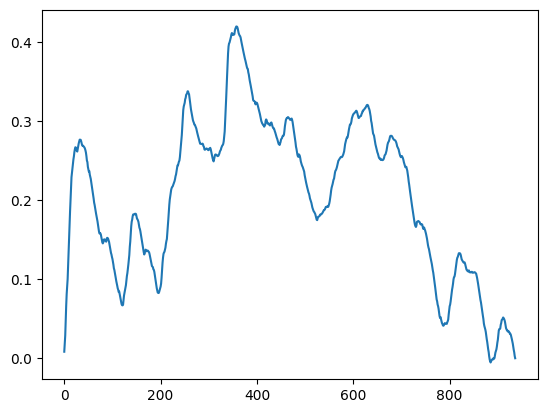

In [81]:
bm.cumsum().plot()

In [84]:
sum((b * b.shift(1)) < 0), sum((bm * bm.shift(1)) < 0), len(b)

(61, 113, 937)

In [85]:
937/113

8.29203539823009